5. Classifying IMDB movie review dataset using deep neural network-binary classification problem.

In [ ]:
# Step 1: Install TensorFlow and scikit-learn
!pip install tensorflow scikit-learn

In [14]:
# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,GlobalMaxPooling1D 
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Step 3: Load the IMDB movie review dataset
num_words = 10000 # Consider only the top 10,000 most frequent words
(X_train,y_train),(X_test, y_test) = imdb.load_data(num_words=num_words)
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 25000, Test samples: 25000


In [12]:
# Step 4: Preprocess the data
max_len = 200 # Maximum sequence length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
print(X_train.shape)

(25000, 200)


In [15]:
# Step 5: Define the neural network architecture
model = Sequential()

# Embedding layer (input_dim: 10,000 most common words, output_dim: 128)
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))

# Global max pooling layer to reduce dimensionality
model.add(GlobalMaxPooling1D())

# Fully connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Dropout for regularization (drop 50% of the nodes during training)
model.add(Dropout(0.5))

# Output layer with 1 unit and sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))


In [16]:
# Step 6: Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128,validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 293ms/step - accuracy: 0.6802 - loss: 0.5967 - val_accuracy: 0.8016 - val_loss: 0.4311
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 259ms/step - accuracy: 0.8557 - loss: 0.3499 - val_accuracy: 0.8306 - val_loss: 0.4176
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 295ms/step - accuracy: 0.8803 - loss: 0.2951 - val_accuracy: 0.8348 - val_loss: 0.3771
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 271ms/step - accuracy: 0.9052 - loss: 0.2458 - val_accuracy: 0.8422 - val_loss: 0.3864
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.9137 - loss: 0.2301 - val_accuracy: 0.7806 - val_loss: 0.5814


In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5073 - loss: 0.6931
Test accuracy: 0.5000


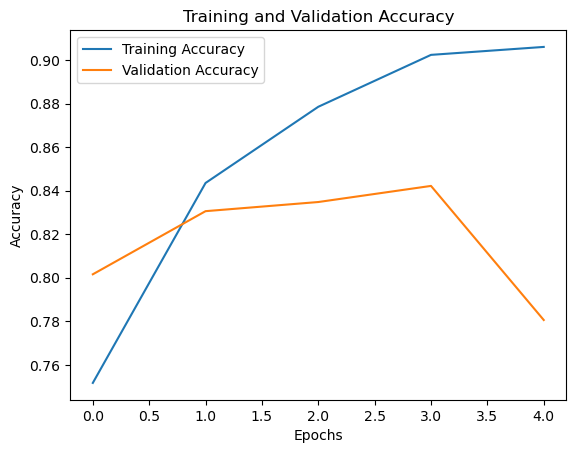

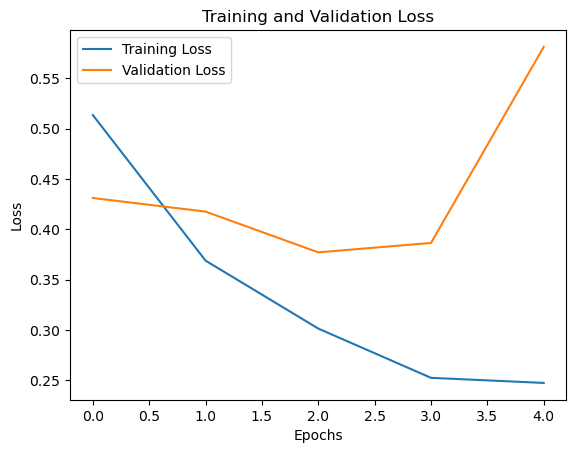

In [20]:
#Step 8: Visualize Training History (Optional)

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
#Step 9: Making Predictions
# Predict the sentiment of a new review (example: from x_test)
import numpy as np
new_review = X_test[0]
prediction = model.predict(np.array([new_review]))
print(f'Prediction: {prediction[0][0]}')
print(f'Actual: {y_test[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: 0.4957943558692932
Actual: 0
